In [1]:
import pandas as pd
import pycaret.classification as classification

In [2]:
train_df = pd.read_csv("train.csv")

In [3]:
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_df_partial = train_df.sample(n=1000)

In [7]:
classification.setup(train_df_partial, target="label")

,Description,Value
0,Session id,6006
1,Target,label
2,Target type,Multiclass
3,Original data shape,"(1000, 785)"
4,Transformed data shape,"(1000, 785)"
5,Transformed train set shape,"(700, 785)"
6,Transformed test set shape,"(300, 785)"
7,Numeric features,784
8,Preprocess,True
9,Imputation type,simple


In [8]:
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8814,0.9873,0.8814,0.8947,0.8811,0.8678,0.8694,0.0930
rf,Random Forest Classifier,0.8543,0.9834,0.8543,0.8667,0.8519,0.8376,0.8394,0.1030
lightgbm,Light Gradient Boosting Machine,0.8529,0.9870,0.8529,0.8670,0.8503,0.8360,0.8380,1.6370
knn,K Neighbors Classifier,0.8357,0.9730,0.8357,0.8577,0.8329,0.8167,0.8197,0.2420
lr,Logistic Regression,0.8200,0.0000,0.8200,0.8304,0.8171,0.7995,0.8010,0.4980
gbc,Gradient Boosting Classifier,0.8171,0.0000,0.8171,0.8403,0.8170,0.7963,0.7989,2.8130
svm,SVM - Linear Kernel,0.8014,0.0000,0.8014,0.8116,0.7958,0.7787,0.7811,0.0560
nb,Naive Bayes,0.6443,0.8822,0.6443,0.6918,0.6379,0.6046,0.6128,0.0420
dt,Decision Tree Classifier,0.6057,0.7811,0.6057,0.6318,0.6015,0.5610,0.5642,0.0540
lda,Linear Discriminant Analysis,0.3600,0.0000,0.3600,0.3640,0.3462,0.2879,0.2909,0.1060


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=6006, verbose=0,
                     warm_start=False)

In [9]:
et_model = classification.create_model("et")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9429,0.9967,0.9429,0.9571,0.9441,0.9364,0.9379
1,0.9000,0.9873,0.9000,0.9073,0.9006,0.8885,0.8893
2,0.8714,0.9851,0.8714,0.8854,0.8695,0.8567,0.8587
3,0.8714,0.9764,0.8714,0.8928,0.8716,0.8564,0.8587
4,0.8429,0.9815,0.8429,0.8502,0.8395,0.8248,0.8263
5,0.8571,0.9864,0.8571,0.8815,0.8625,0.8411,0.8426
6,0.8571,0.9920,0.8571,0.8722,0.8569,0.8408,0.8427
7,0.9143,0.9921,0.9143,0.9241,0.9139,0.9045,0.9057
8,0.8143,0.9803,0.8143,0.8313,0.8113,0.7929,0.7950


In [10]:
tuned_model = classification.tune_model(et_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.9930,0.8571,0.8698,0.8528,0.8409,0.8436
1,0.8714,0.9798,0.8714,0.8920,0.8685,0.8567,0.8590
2,0.8000,0.9780,0.8000,0.8208,0.8034,0.7774,0.7790
3,0.8857,0.9849,0.8857,0.9013,0.8849,0.8724,0.8740
4,0.8857,0.9826,0.8857,0.8919,0.8850,0.8725,0.8733
5,0.8000,0.9845,0.8000,0.8375,0.8057,0.7775,0.7807
6,0.8571,0.9923,0.8571,0.8575,0.8535,0.8410,0.8419
7,0.8286,0.9873,0.8286,0.8661,0.8166,0.8094,0.8145
8,0.8286,0.9794,0.8286,0.8363,0.8204,0.8087,0.8112


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


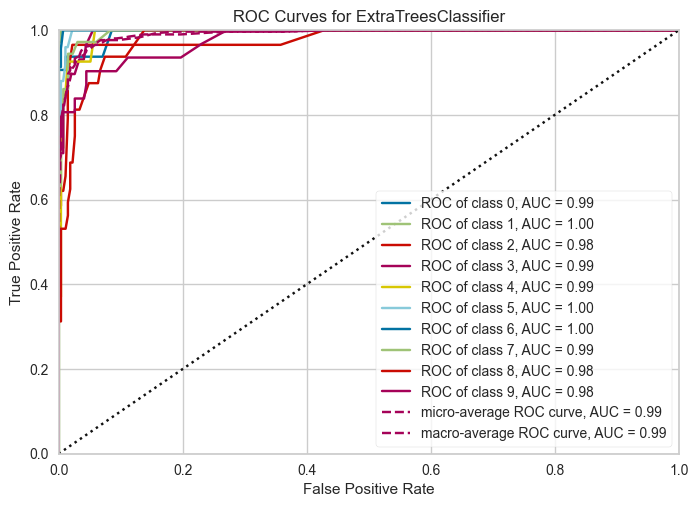

In [11]:
classification.plot_model(et_model)

In [12]:
final_model = classification.finalize_model(et_model)

In [13]:
test_df = pd.read_csv("test.csv")

In [16]:
predicted_df = classification.predict_model(final_model, test_df)
predicted_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,prediction_label,prediction_score
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0.75
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.88
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,0.35
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,0.25
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,0.76
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,0.81
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0.90
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,0.59


In [17]:
submit_df = predicted_df[["prediction_label"]]
submit_df

,prediction_label
0,2
1,0
2,9
3,7
4,3
...,...
27995,9
27996,7
27997,3
27998,9


In [24]:
submit_df.to_csv("submit.csv")

In [27]:
with open("submit.csv") as f:
    with open("submit2.csv", "w") as g:
        for line in f:
            break
        print("ImageId,Label", file=g)
        for line in f:
            line = line.strip()
            elems = line.split(",")
            image_id = int(elems[0])
            label = elems[1]
            print(f"{image_id+1},{label}", file=g)